## Importing necessary libraries.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Reading the training and test data

In [26]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [27]:
train.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149


In [28]:
test.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180


# Processing the Data

### Dividing the training and test data into data and labels as evverything is combined


In [29]:
data = train.iloc[:,1:].values
labels = train['label']

test_data = test.iloc[:,1:].values
test_labels = test['label']

### Converting Integer data of labels to categorical data b/w 0 to 1.

In [30]:
from sklearn.preprocessing import LabelBinarizer

In [31]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
test_labels = lb.fit_transform(test_labels)

In [32]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

### Turning the data into (28*28) pixels.

In [33]:
data = data.reshape(-1,28,28)

test_data = test_data.reshape(-1,28,28)

In [34]:
data.shape, test_data.shape

((27455, 28, 28), (7172, 28, 28))

### Checking image data by plotting it.

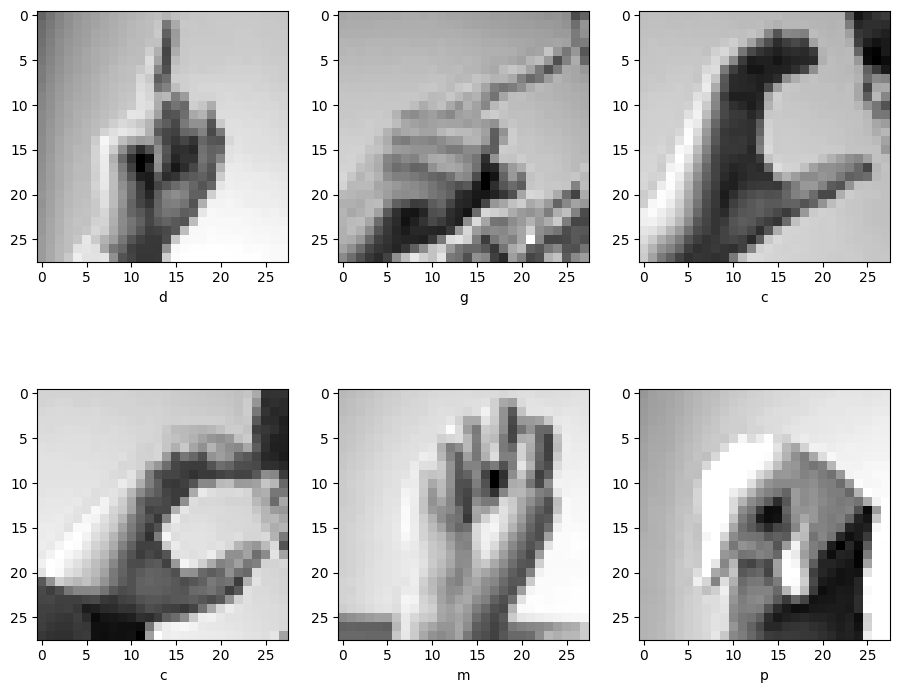

In [35]:
plt.figure(figsize=(11,9))

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(data[i],cmap='gray')
    plt.xlabel(chr(97+np.argmax(labels[i])))

### Normalizing the training and test data.

In [36]:
data = data/data.max()
test_data = test_data/test_data.max()

### Adding color channel parameter to the training and test data.

In [37]:
# B&W = 1 Channel
# RGB = 3 Channel
data = data.reshape(-1,28,28,1)
test_data = test_data.reshape(-1,28,28,1)

### Splitting the data into training, test and cross validation

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_valid, y_train, y_valid = train_test_split(data, labels, test_size=0.3, random_state=42)
X_test, y_test = test_data, test_labels

In [40]:
X_train.shape, X_valid.shape, X_test.shape

((19218, 28, 28, 1), (8237, 28, 28, 1), (7172, 28, 28, 1))

In [41]:
y_train.shape, y_valid.shape, y_test.shape

((19218, 24), (8237, 24), (7172, 24))

# Creating CNN Model

In [42]:
# Model
from keras.models import Sequential

# Layers
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [43]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(24, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### Model Summary

In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,136 (1.72 MB)

 Trainable params: 450,136 (1.72 MB)

 Non-trainable params: 0 (0.00 B)

### Training the CNN Model with the Training data and validating it. 

In [45]:
history = model.fit(X_train,y_train,
                   validation_data=(X_valid,y_valid),
                   epochs=5)

Epoch 1/5
601/601 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4154 - loss: 2.0043 - val_accuracy: 0.8944 - val_loss: 0.3095
Epoch 2/5
601/601 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9615 - loss: 0.1338 - val_accuracy: 0.9762 - val_loss: 0.0689
Epoch 3/5
601/601 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9947 - loss: 0.0233 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 4/5
601/601 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9982 - loss: 0.0071 - val_accuracy: 1.0000 - val_loss: 9.5488e-05
Epoch 5/5
601/601 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 3.7608e-05


### Plotting to understand model's behaviour over the epochs.

<Axes: >

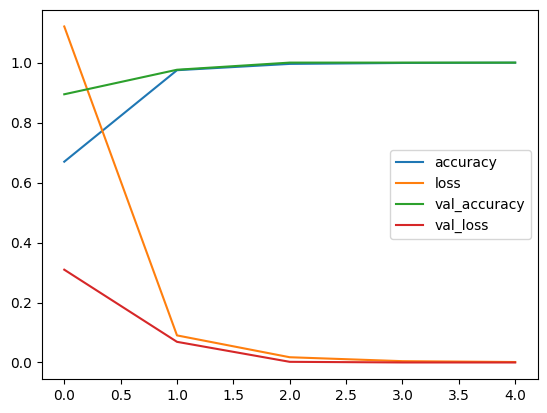

In [46]:
pd.DataFrame(history.history).plot()

### Predicting values for the test data.

In [49]:


# Assuming you have imported necessary libraries and created your model (model = Sequential())
# Make predictions
predictions_probabilities = model.predict(X_test)

# Convert probabilities to class labels
predictions = predictions_probabilities.argmax(axis=-1)


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [50]:
predictions

array([6, 5, 9, ..., 2, 4, 2], dtype=int64)

In [51]:
y_te = np.argmax(y_test,axis=1)
y_te

array([6, 5, 9, ..., 2, 4, 2], dtype=int64)

### Comparing the predicted values with the actual test values

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_te, predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       331
           1       1.00      0.98      0.99       432
           2       1.00      0.94      0.97       310
           3       0.92      1.00      0.96       245
           4       0.88      0.96      0.92       498
           5       0.93      1.00      0.96       247
           6       0.93      0.94      0.94       348
           7       0.92      0.91      0.92       436
           8       0.88      1.00      0.94       288
           9       0.93      0.94      0.93       331
          10       0.91      1.00      0.95       209
          11       1.00      0.89      0.94       394
          12       0.92      0.78      0.85       291
          13       1.00      0.83      0.90       246
          14       0.93      1.00      0.96       347
          15       0.96      0.87      0.91       164
          16       0.80      0.57      0.66       144
          17       0.84    